In [1]:
import numpy as np
import pandas as pd
from astropy.io import ascii
from astropy.coordinates import SkyCoord
from astropy import units as u
import os
import matplotlib.pyplot as plt

In [2]:
pop1 = pd.read_csv('Catalogues/NGC1027_GMM_Population1.csv')
pop1

,RA_ICRS,DE_ICRS,Source,Plx,e_Plx,PM,pmRA,pmDE,Solved,nueff,...,RUWE,Gmag,BPmag,RPmag,BP-RP,RV,ELAT,RAJ2000,DEJ2000,Plx_corr
0,41.570274,61.173409,464949661706849280,0.8300,0.0378,2.577,-1.596,2.023,31,1.440,...,1.041,16.192581,16.815716,15.430469,1.385247,NaN,42.572996,41.570289,61.173400,0.858649
1,41.654500,61.223746,464950211462625792,0.9554,0.0447,2.603,-1.741,1.936,31,1.433,...,0.919,16.519371,17.166830,15.747625,1.419205,NaN,42.602652,41.654516,61.223737,0.984442
2,41.209813,61.006434,465597755092954240,0.8735,0.0226,2.731,-1.759,2.089,31,1.467,...,1.040,14.797569,15.339229,14.089526,1.249702,NaN,42.490896,41.209829,61.006425,0.906890
3,40.922414,61.094239,465602702895244800,0.9349,0.0354,2.764,-1.855,2.050,31,1.455,...,1.014,15.765883,16.284992,14.968859,1.316134,NaN,42.627734,40.922431,61.094230,0.967899
4,41.048801,61.210897,465609536182815360,0.8934,0.1147,2.763,-1.796,2.100,31,1.353,...,1.031,17.792515,18.752975,16.841764,1.911211,NaN,42.709319,41.048818,61.210887,0.923362
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
339,40.647394,61.871775,465789310636096000,0.9833,0.0396,2.852,-1.552,2.392,31,1.425,...,1.065,16.036766,16.704792,15.236662,1.468130,NaN,43.390329,40.647408,61.871765,1.013460
340,40.392316,61.874609,465792776664493056,0.8847,0.0905,2.739,-1.458,2.319,31,1.362,...,1.055,17.578274,18.483139,16.630777,1.852362,NaN,43.442964,40.392330,61.874599,0.916612
341,40.829959,61.969541,465797174711250816,0.8363,0.0500,2.345,-1.315,1.941,31,1.437,...,0.974,16.421690,17.058884,15.648010,1.410873,NaN,43.443625,40.829972,61.969532,0.865062
342,41.165594,62.224776,465824357570342272,0.9116,0.0661,2.432,-1.620,1.814,31,1.396,...,1.017,17.059484,17.842627,16.199720,1.642906,NaN,43.610916,41.165609,62.224768,0.942167


In [3]:
pop2 = pd.read_csv('Catalogues/NGC1027_GMM_Population2.csv')
pop2

,RA_ICRS,DE_ICRS,Source,Plx,e_Plx,PM,pmRA,pmDE,Solved,nueff,...,RUWE,Gmag,BPmag,RPmag,BP-RP,RV,ELAT,RAJ2000,DEJ2000,Plx_corr
0,41.391974,60.440972,464797963461759488,0.8665,0.0250,2.589,-1.793,1.868,31,1.439,...,1.104,15.092919,15.710403,14.297459,1.412945,NaN,41.937564,41.391990,60.440964,0.900277
1,41.760686,60.667446,464824798418117120,0.9060,0.0240,2.491,-1.459,2.020,31,1.451,...,1.008,15.022243,15.609508,14.280652,1.328855,NaN,42.072503,41.760699,60.667437,0.939593
2,41.971368,60.869426,464833766309733248,0.8965,0.0135,2.625,-1.530,2.133,31,1.545,...,0.970,13.546622,13.889764,13.031779,0.857985,NaN,42.216559,41.971382,60.869417,0.930231
3,41.851684,60.892326,464836652527754368,0.9197,0.0136,2.608,-1.809,1.878,31,1.540,...,1.006,12.826741,13.182690,12.293089,0.889601,NaN,42.260835,41.851700,60.892318,0.941174
4,41.581220,61.004063,464850770077768704,0.8678,0.0230,2.656,-1.653,2.079,31,1.437,...,1.014,14.985799,15.615413,14.209435,1.405977,NaN,42.415918,41.581235,61.004054,0.901501
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
521,40.799686,62.532005,466023644050466560,0.9817,0.0642,2.630,-1.725,1.986,31,1.393,...,0.998,17.081020,17.874979,16.217472,1.657507,NaN,43.960869,40.799703,62.531996,1.012394
522,39.226658,62.617307,466071434144149120,0.9070,0.0485,2.808,-1.993,1.979,31,1.414,...,0.970,16.447214,17.155657,15.630446,1.525211,NaN,44.345737,39.226677,62.617298,0.936223
523,42.672829,62.162159,467252240914244480,0.9654,0.0409,2.769,-1.700,2.186,31,1.426,...,1.007,16.238014,16.906803,15.442007,1.464796,NaN,43.267141,42.672845,62.162149,0.994258
524,41.114886,62.905429,467535884855567872,0.9308,0.0180,2.818,-1.936,2.048,31,1.433,...,0.945,8.369972,9.017055,7.584709,1.432346,-43.63,44.239616,41.114905,62.905420,0.959092


## Plotting their CMDS

Text(0.5, 0, 'BP - RP (mag)')

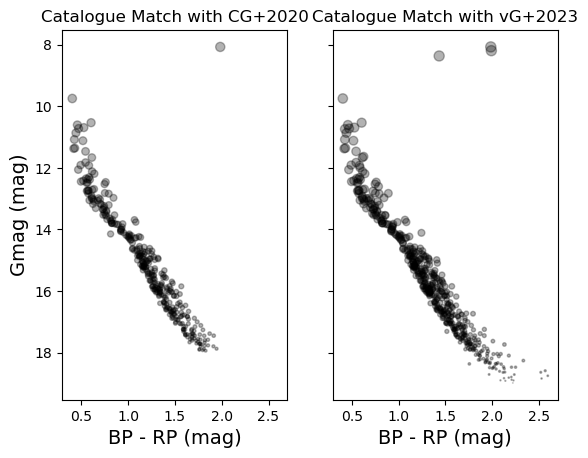

In [4]:
fig,ax = plt.subplots(1,2,sharex=True,sharey=True)

ax[0].set_title('Catalogue Match with CG+2020')
ax[0].scatter(pop1['BP-RP'],pop1.Gmag, s=(19-pop1.Gmag)*4,c='k', alpha=0.3)
ax[0].set_xlabel('BP - RP (mag)',fontsize=14)
ax[0].set_ylabel('Gmag (mag)',fontsize=14)
ax[0].invert_yaxis()

ax[1].set_title('Catalogue Match with vG+2023')
ax[1].scatter(pop2['BP-RP'],pop2.Gmag, s=(19-pop2.Gmag)*5, c='k', alpha=0.3)
ax[1].set_xlabel('BP - RP (mag)',fontsize=14)

### Adjusting the isochrones

In [6]:
#reading the table of isochrones
iso = ascii.read("Catalogues/isochrones.csv")

In [8]:
kk, = np.where(iso["logAge"] == 8.05001)  #binaries
jj, = np.where(iso["logAge"] == 8.10001)
ll, = np.where(iso["logAge"] == 8.15001)  #turn

iso_sel1 = iso[kk]
iso_sel2 = iso[jj]
iso_sel3 = iso[ll]

In [9]:
EBV = 0.36
AV = 3.1 * EBV

# Modulo da distancia em Mpc tirado de CG+2020
Md = 10.2

DY = Md + 0.8363*AV
DX = (1.083-0.634)*AV

Text(0.5, 0, '$G_{BP}-G_{RP}$ (mag)')

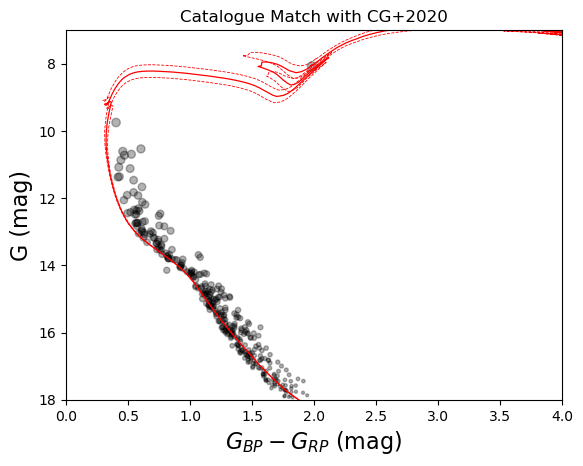

In [11]:
fig, ax = plt.subplots()
ax.set_title("Catalogue Match with CG+2020")
ax.scatter(pop1['BP-RP'],pop1.Gmag, s=(19-pop1.Gmag)*4,c='k', alpha=0.3)
ax.plot((iso_sel1['G_BPmag']-iso_sel1['G_RPmag']) + DX, iso_sel1["Gmag"] + DY, color='r',linestyle='--',linewidth=0.6)
ax.plot((iso_sel2['G_BPmag']-iso_sel2['G_RPmag']) + DX, iso_sel2["Gmag"] + DY, color='r',linewidth=0.9)
ax.plot((iso_sel3['G_BPmag']-iso_sel3['G_RPmag']) + DX, iso_sel3["Gmag"] + DY, color='r',linestyle='--',linewidth=0.6)

ax.set_xlim(0, 4.0)
ax.set_ylim(18, 7)
ax.set_ylabel(r"G (mag)",fontsize=16)
ax.set_xlabel(r"$G_{BP}-G_{RP}$ (mag)",fontsize=16)

Text(0.5, 0, '$G_{BP}-G_{RP}$ (mag)')

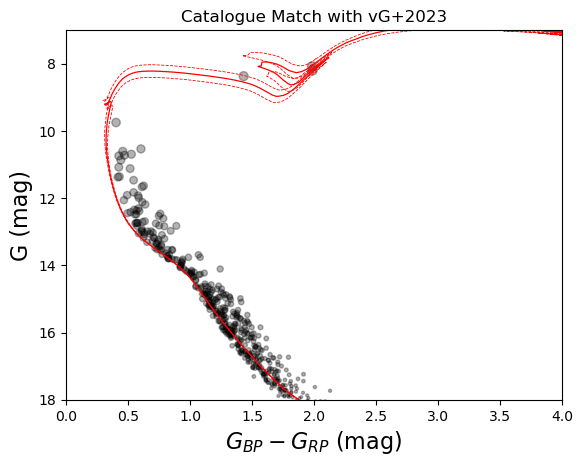

In [12]:
fig, ax = plt.subplots()
ax.set_title("Catalogue Match with vG+2023")
ax.scatter(pop2['BP-RP'],pop2.Gmag, s=(19-pop2.Gmag)*4,c='k', alpha=0.3)
ax.plot((iso_sel1['G_BPmag']-iso_sel1['G_RPmag']) + DX, iso_sel1["Gmag"] + DY, color='r',linestyle='--',linewidth=0.6)
ax.plot((iso_sel2['G_BPmag']-iso_sel2['G_RPmag']) + DX, iso_sel2["Gmag"] + DY, color='r',linewidth=0.9)
ax.plot((iso_sel3['G_BPmag']-iso_sel3['G_RPmag']) + DX, iso_sel3["Gmag"] + DY, color='r',linestyle='--',linewidth=0.6)

ax.set_xlim(0, 4.0)
ax.set_ylim(18, 7)
ax.set_ylabel(r"G (mag)",fontsize=16)
ax.set_xlabel(r"$G_{BP}-G_{RP}$ (mag)",fontsize=16)